In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader.data import DataReader
from datetime import date



In [3]:
# Import the data
income = pd.read_csv('per_capita_income.csv')

# Inspect the result
income.info()

# Sort the data by income
income = income.sort_values('Income per Capita', ascending=False)

# Display the first and last five rows
print(income.head())
(income.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            184 non-null    object 
 1   Income per Capita  184 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB
               Country  Income per Capita
133              Qatar       141542.66280
97    Macao SAR, China       111496.62940
96          Luxembourg       102051.68030
144          Singapore        85382.30227
23   Brunei Darussalam        78369.29102


,Country,Income per Capita
121,Niger,955.483324
94,Liberia,835.366935
37,"Congo, Dem. Rep.",784.365232
26,Burundi,727.150789
31,Central African Republic,618.752859


In [4]:
# Calculate the mean
print(income['Income per Capita'].mean())

# Calculate the median
print(income['Income per Capita'].median())

# Create the new column
income['Income per Capita (,000)'] = income['Income per Capita'] // 1000

# Calculate the mode of the new column
income['Income per Capita (,000)'].mode()

19469.41956573696
11620.93252


0    1.0
Name: Income per Capita (,000), dtype: float64

In [5]:
# Calculate mean
mean = income['Income per Capita'].mean()

# Calculate standard deviation
std = income['Income per Capita'].std()

# Calculate and print lower and upper bounds
bounds = [mean - std, mean + std]
print(bounds)

# Calculate and print first and third quartiles
quantiles = income['Income per Capita'].quantile([0.25, 0.75])
print(quantiles)

# Calculate and print IQR
iqr = quantiles[0.75] - quantiles[0.25]
print(iqr)

[-2497.4416414691186, 41436.280772943035]
0.25     3922.35894
0.75    26558.75467
Name: Income per Capita, dtype: float64
22636.395729999997


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


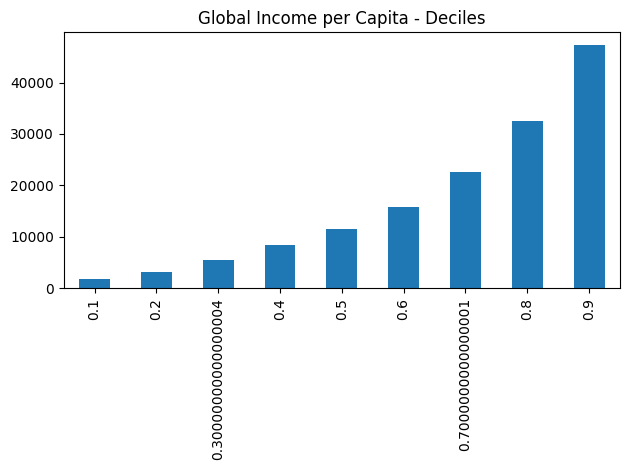

In [8]:
# Generate range of deciles
quantiles = np.arange(0.1, 1, 0.1)

# Print them
print(quantiles)

# Calculate deciles for 'Income per Capita'
deciles = np.round(income['Income per Capita'].quantile(quantiles),2)

# Plot deciles as a bar chart
deciles.plot(kind='bar', title='Global Income per Capita - Deciles')

# Make sure to use the tight layout!
plt.tight_layout()

# Show the plot
plt.show()

       Income per Capita  Income per Capita (,000)
count         184.000000                184.000000
mean        19469.419566                 18.967391
std         21966.861207                 21.975869
min           618.752859                  0.000000
25%          3922.358940                  3.000000
50%         11620.932520                 11.000000
75%         26558.754670                 26.000000
max        141542.662800                141.000000


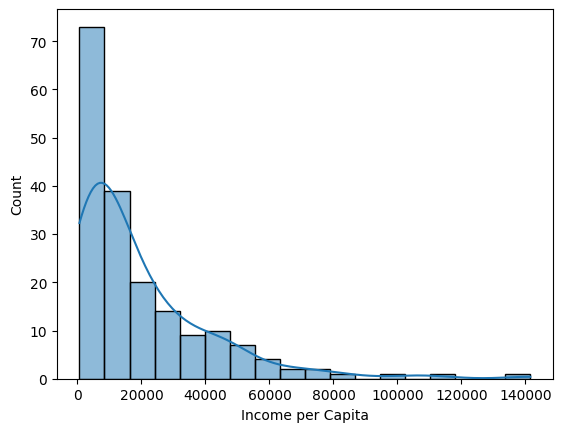

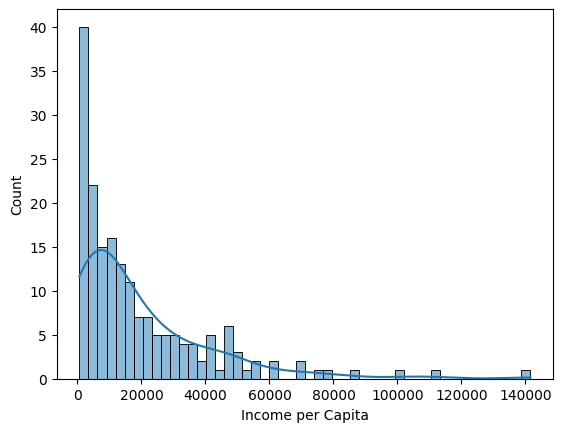

In [16]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Print the summary statistics for income
print(income.describe())

# Plot a basic histogram of income per capita
sns.histplot(income['Income per Capita'],kde=True)

# Show the plot
plt.show()

# Plot a rugplot
sns.histplot(income['Income per Capita'], bins=50, kde=True, )

# Show the plot
plt.show()

In [18]:

# Load the file into growth
growth = pd.read_csv('income_growth.csv', parse_dates=['DATE']).set_index('DATE')

# Inspect the summary statistics for the growth rates
(growth.describe())

,China,Brazil,USA
count,40.000000,40.000000,40.000000
mean,0.083084,0.013315,0.018239
std,0.032205,0.033211,0.019386
min,-0.030813,-0.066154,-0.036241
25%,0.067948,-0.005524,0.009093
50%,0.085920,0.016912,0.019851
75%,0.099599,0.032199,0.030144
max,0.136383,0.071762,0.063344


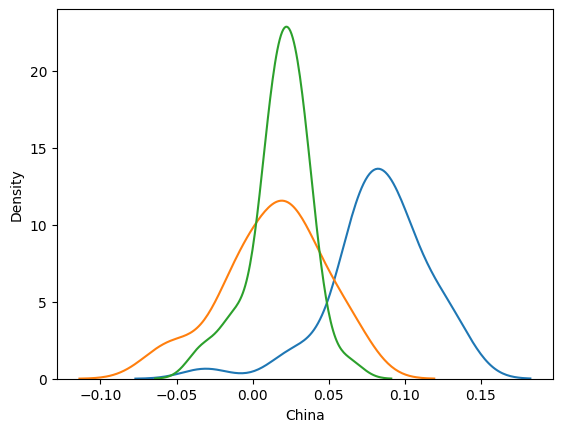

In [24]:
# Iterate over the three columns
for column in growth.columns:
    sns.kdeplot(growth[column], label=column)

# Show the plot
plt.show()

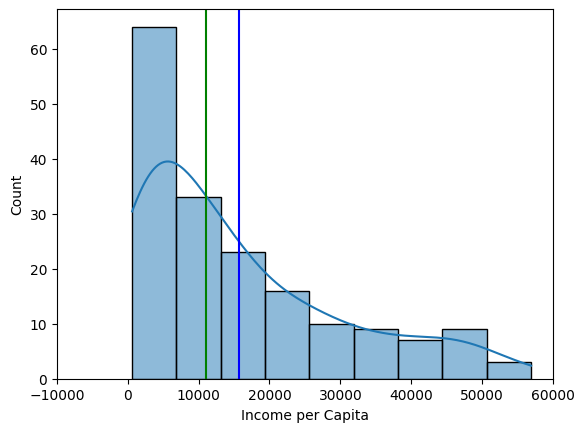

In [29]:
# Create inc_per_capita
inc_per_capita = income['Income per Capita']

# Filter out incomes above the 95th percentile
inc_per_capita = inc_per_capita[inc_per_capita < inc_per_capita.quantile(0.95)]

# Plot histogram and assign to ax
ax = sns.histplot(inc_per_capita,kde=True)
plt.xlabel('Income per Capita')
plt.ylabel('Count')
plt.xlim(-10000, 60000)

# Highlight mean
ax.axvline(inc_per_capita.mean(), color='b')

# Highlight median
ax.axvline(inc_per_capita.median(), color='g')

# Show the plot
plt.show()

In [35]:
import pandas as pd

# Create the pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listings = pd.concat(listings).reset_index(drop=True)

# Inspect the results
listings.info()

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   Exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 417.3+ KB


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [33]:
listings

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling,amex
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN,amex
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN,amex
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN,amex
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN,amex
...,...,...,...,...,...,...,...,...
3142,ZB^H,Zions Bancorporation,25.3000,0.000000e+00,NaN,NaN,NaN,nyse
3143,ZBK,Zions Bancorporation,28.8600,0.000000e+00,NaN,Finance,Major Banks,nyse
3144,ZOES,"Zoe&#39;s Kitchen, Inc.",17.0700,3.325561e+08,2014.0,Consumer Services,Restaurants,nyse
3145,ZTS,Zoetis Inc.,53.1000,2.610544e+10,2013.0,Health Care,Major Pharmaceuticals,nyse


In [43]:
listings['Exchange'].unique()

array(['amex', 'nasdaq', 'nyse'], dtype=object)

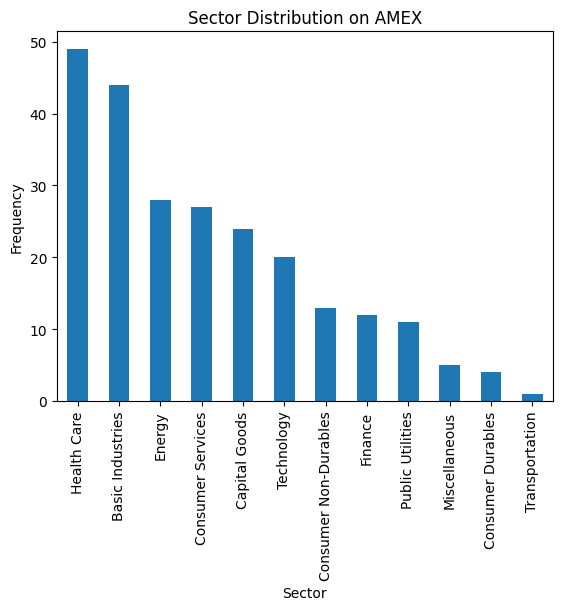

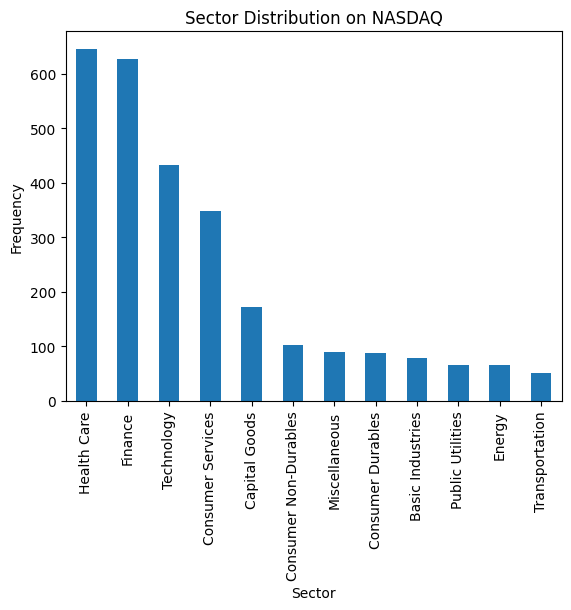

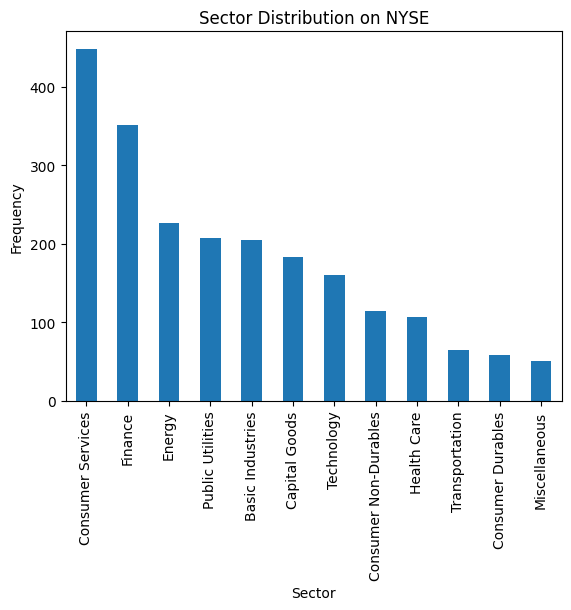

In [44]:
# Solution
# Create the list exchanges
exchanges = ['amex', 'nasdaq', 'nyse']

# Iterate over exchanges then plot and show result
for exchange in exchanges:
    if exchange in listings['Exchange'].unique():
        df = listings[listings['Exchange'] == exchange]
        sectors = df['Sector'].value_counts()
        sectors.sort_values(ascending=False).plot(kind='bar')
    else:
        print(f"{exchange} not found in dictionary")
    plt.title('Sector Distribution on ' + exchange.upper())
    plt.xlabel('Sector')
    plt.ylabel('Frequency')
    # Show the plot
    plt.show()

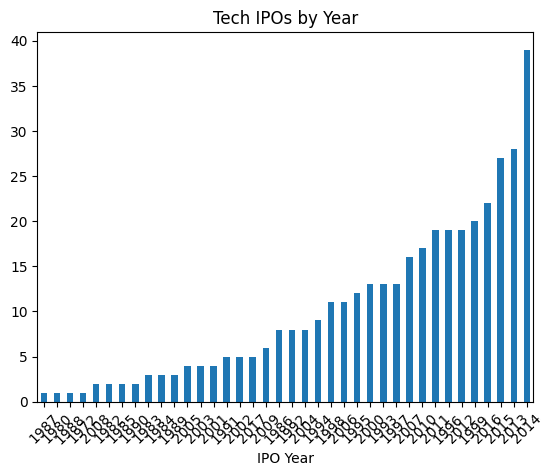

In [48]:
# # Create lists
# exchanges = ['amex', 'nasdaq', 'nyse']
# all_listings = []

# # Use for loop to create listing_data
# for exchange in exchanges:
#     all_listings.append(listings[exchange])
    
# # Combine DataFrames
# listing_data = pd.concat(all_listings)
listing_data = listings
# Select tech companies
tech_companies = listing_data[listing_data.Sector == 'Technology']

# Create ipo_years
ipo_years = tech_companies['IPO Year']

# Drop missing values and convert to int
ipo_years = ipo_years.dropna().astype(int)

# Count values, sort ascending by year, and create a bar plot
ipo_years.value_counts(ascending=True).plot(kind='bar', title='Tech IPOs by Year')

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()